In [1]:
import numpy as np
from scipy import constants as const
from scipy.special import zeta
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = True

For a gas composed of a single atomic species, the Saha ionization equation is written as 

$\qquad\displaystyle \frac{n_{i+{\tiny{ 1}}}+n_e}{n_i} = \frac{2}{\lambda_{\tiny{\text{th}}}^3} \frac{g_{i+{\tiny 1}}}{g_i} \exp \left[ - \frac{\epsilon_{i+{\tiny 1}} - \epsilon_{i} } {k_{\tiny B} T} \right] $

where  :  

- $n_{\tiny i}$ is the **number density** of atoms in the *i-th* state of ionization (i.e., with $i$ electrons removed).  
- $g_{\tiny i}$ is the **degeneracy** of the $i$-ion state.  
- $\varepsilon_{\tiny i}$ is the **energy required** to remove $i$ electrons from a neutral atom, creating an $i$-level ion.  
- $n_{\small e}$ is the **electron density**.  
- $k_{\tiny B}$ is the **Boltzmann constant**.  
- $\lambda_{\tiny{\text{th}}}$ is the **thermal de Broglie wavelength** of an electron, defined as                                                                        
  $\qquad\displaystyle \lambda_{\tiny{\text{th}}} \; \stackrel{\mathrm{def}}{=} \;  \frac{h}{\sqrt{2 \pi m_{\small e} k_{\tiny B} T}}$                                                                        
- $m_{\small e}$ is the **mass of an electron**.  
- $T$ is the **temperature** of the gas.  
- $h$ is the **Planck constant**.


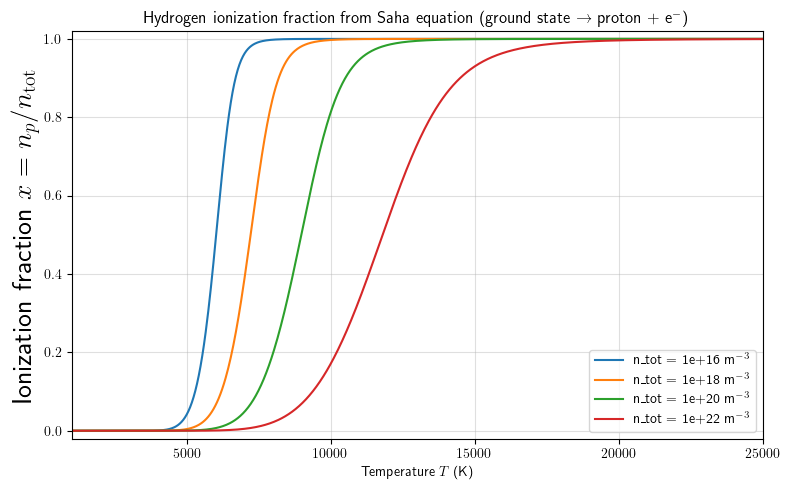

In [2]:
def lambda_th(T, h, m_e, k_B):
    return h / np.sqrt(2 * np.pi * m_e * k_B * T)

def saha_S(lambda_th, T, chi, k_B, g_ratio=0.5):
    lam = lambda_th(T, h, m_e, k_B)
    return (2.0 / lam**3) * g_ratio * np.exp(-chi / (k_B * T))

def ionization_fraction_from_S(S, n_tot):
    a     =  1.0
    b     =  S / n_tot
    c     = -S / n_tot
    disc  = b**2 - 4*a*c
    disc  = np.maximum(disc, 0.0)
    root1 = (-b + np.sqrt(disc)) / (2*a)
    root2 = (-b - np.sqrt(disc)) / (2*a)
    
    for r in (root1, root2):
        if 0.0 <= r <= 1.0:
            return r
   
    return np.clip(root1, 0.0, 1.0)

k_B = const.Boltzmann    # J/K
h   = const.h            # Planck constant J*s
m_e = const.m_e          # electron mass kg
eV  = const.eV           # 1 eV in J

chi_eV = 13.56           # Hydrogen ionization energy in Joules
chi    = chi_eV * eV     # in J

T = np.linspace(1000, 25000, 800)
n_totals = [1e16, 1e18, 1e20, 1e22]   

plt.figure(figsize=(8,5))
for n in n_totals:
    S_vals = saha_S(lambda_th, T, chi, k_B)
    x_vals = np.array([ionization_fraction_from_S(S, n) for S in S_vals])
    plt.plot(T, x_vals, label=f"n_tot = {n:.0e} m$^{{-3}}$")

plt.xlabel("Temperature $T$ (K)")
plt.ylabel("Ionization fraction $x = n_p / n_{\\rm tot}$", fontsize=20)
plt.title("Hydrogen ionization fraction from Saha equation (ground state → proton + e$^-$)")
plt.ylim(-0.02, 1.02)
plt.xlim(T.min(), T.max())
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

## Statistical Mechanics by Pathria 

<span style="color:red">Determine the equilibrium ionization fraction for the reaction
$$
\mathrm{Na} \rightleftharpoons \mathrm{Na^+} + e^-
$$
in a sodium vapor. Treat all three species as ideal classical monatomic gases.                                                                              
The ionization energy of sodium is 5.139 eV, Na⁺ ions are spin-zero, and neutral Na and free e⁻ are both spin $-\tfrac{1}{2}$.                                          
Derive the Saha equation for the ionized fraction
$$
\frac{[\mathrm{Na^+}]}{[\mathrm{Na}] + [\mathrm{Na^+}]}
$$
for a neutral plasma as a function of temperature at a fixed total density.                                                                                  
Plot the ionized fraction as a function of temperature for some chosen total density.


For classical ideal gases, the chemical potential is:

$$
\mu = - k_B T \ln Z_1 + k_B T \ln n
$$

where $Z_1$ is the single-particle partition function, and $n$ is the number density. For a monatomic gas with internal degeneracy $g$, we have

$$
Z_1 = \frac{g V}{\lambda^3}, \quad \lambda = \sqrt{\frac{h^2}{2\pi m k_B T}}
$$

Then the chemical potential is:

$$
\mu = - k_B T \ln g + k_B T \ln n \lambda^3
$$

Let $\epsilon_b = \chi$ be the ionization energy of Na:

1. **Neutral sodium ($\rm Na$)** – spin-1/2 → $g_{\rm Na} = 2$:

$$
\mu_{\rm Na} = - \epsilon_b - k_B T \ln 2 + k_B T \ln(n_{\rm Na} \lambda_{\rm Na}^3)
$$

* The $-\epsilon_b$ is included because the energy reference is shifted by the binding energy.

2. **Sodium ion ($\rm Na^+$)** – spin-0 → $g_{\rm Na^+} = 1$:

$$
\mu_{\rm Na^+} = k_B T \ln(n_{\rm Na^+} \lambda_{\rm Na^+}^3)
$$

* No binding energy term because it’s already “ionized”.

3. **Electron ($e^-$)** – spin-1/2 → $g_e = 2$:

$$
\mu_e = - k_B T \ln 2 + k_B T \ln(n_e \lambda_e^3)
$$

At chemical equilibrium:

$$
\mu_{\rm Na} = \mu_{\rm Na^+} + \mu_e
$$

Substitute the expressions:

$$
-\epsilon_b - k_B T \ln 2 + k_B T \ln(n_{\rm Na} \lambda_{\rm Na}^3) = k_B T \ln(n_{\rm Na^+} \lambda_{\rm Na^+}^3) - k_B T \ln 2 + k_B T \ln(n_e \lambda_e^3)
$$

* Neglect $\lambda_{\rm Na} \approx \lambda_{\rm Na^+} \ll \lambda_e$
* Combine logarithms:

$$
\ln n_{\rm Na} - \ln(n_{\rm Na^+} n_e) = \frac{\epsilon_b}{k_B T} + \ln \frac{\lambda_e^3}{2} \quad \Rightarrow \quad \frac{n_{\rm Na}}{n_{\rm Na^+} n_e} = \lambda_e^3 e^{\epsilon_b / (k_B T)}
$$

This is exactly the standard **Saha relation**.


Let

$$
f = \frac{n_{\rm Na^+}}{n_0}, \quad n_e = n_{\rm Na^+}, \quad n_{\rm Na} = n_0 (1-f)
$$

Then

$$
\frac{n_0 (1-f)}{(f n_0)^2} = \frac{1-f}{f^2 n_0} = \lambda_e^3 e^{\epsilon_b / (k_B T)}  
$$

$$ \frac{1-f}{f^2} = n_0 \lambda_e^3 e^{\epsilon_b / (k_B T)} = s(T) $$

$$ 1-f=f^2 s(T) \quad\Rightarrow\quad f^2 s(T)  +  f - 1 = 0 \quad\Rightarrow\quad f = \frac{-1\pm\sqrt{(-1)^2 - 4(s(T))(1)}}{2s(T)} = \frac{-1\pm\sqrt{1 - 4s(T)}}{2s(T)} $$

The physically acceptable root is the one that lies in $[0,1]$, then :

$$
f(T) = \frac{\sqrt{1 + 4 s(T)} - 1}{2 s(T)}
$$


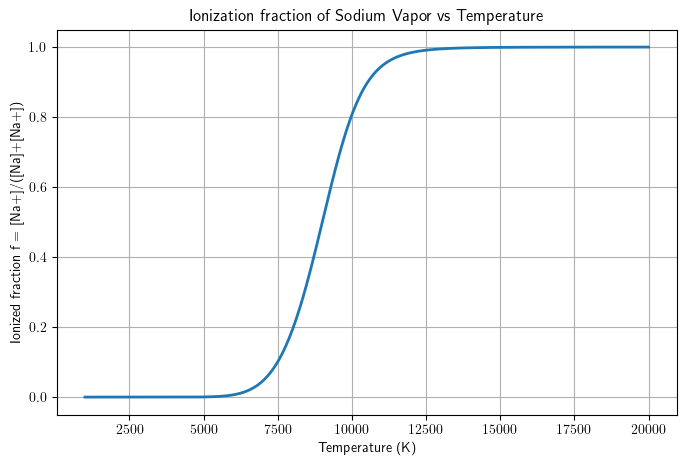

In [3]:
def saha_na_fraction(T, n0, chi, k, h, m_e):
    lambda_e = h / np.sqrt(2 * np.pi * m_e * k * T)      # Electron thermal wavelength
    s = n0 * lambda_e**3 * np.exp(chi / (k * T))         # Saha parameter s(T)  
    f = (-1 + np.sqrt(1 + 4*s)) / (2*s)  
    return f
    
e   = const.e           # Elementary charge (C)
k   = const.k           # Boltzmann constant (J/K)
h   = const.h           # Planck constant (J*s)
m_e = const.m_e         # Electron mass (kg)
eV  = const.eV          # 1 electronvolt in Joules
chi = 13.6 * e          # Hydrogen ionization energy in Joules
n0  = 1e20              # Total sodium density in m^-3
T   = np.linspace(1000, 20000, 500)  # K
f_Na = saha_na_fraction(T, n0, chi, k, h, m_e)

plt.figure(figsize=(8,5))
plt.plot(T, f_Na, lw=2, color='tab:blue')
plt.xlabel("Temperature (K)")
plt.ylabel("Ionized fraction f = [Na+]/([Na]+[Na+])")
plt.title("Ionization fraction of Sodium Vapor vs Temperature")
plt.grid(True)
plt.show()

<span style="color:red">**Big Bang Nucleosynthesis and Deuterium Formation**                                                                                   
Light nuclei other than hydrogen first formed between 3–4 minutes after the Big Bang, when the temperature dropped to about $T \sim 10^9 \, \text{K}$.       
(a) Explain why deuterium formation was delayed until the Universe cooled to $T \sim 10^9 \, \text{K}$, even though the binding energy of the deuteron is $\epsilon_b = 2.20 \, \text{MeV}$.                                                                                                                        
(b) Starting from the chemical equilibrium relation for the reaction
$$
p + n \rightleftharpoons d + \gamma ,
$$
derive the expression for the deuteron fraction $\displaystyle{ f_{\tiny d} = \frac{n_{\tiny d}}{n_{\tiny b}}}$.                                                                                        
(c) Define the parameter $s$ in the equilibrium condition, and write down the approximate behavior of $f_{\tiny d}$ at **high temperatures** ($s \ll 1$) and **low temperatures** ($s \gg 1$).                                                                                                                               
(d) Sketch or plot qualitatively the deuteron fraction $f_d$ vs. temperature for a neutron fraction $q = 0.12$ and baryon-to-photon ratio $\eta = 6 \times 10^{-10}$.


### (a) cause of deuterium formation was delayed

* Even though the **binding energy** of the deuteron is $\epsilon_b = 2.20 \, \text{MeV}$,
  the early Universe was filled with an **intense photon bath** from the blackbody radiation.
* At $T > 10^9 \, \text{K}$, high-energy photons could **photodissociate deuterium nuclei** as soon as they formed.
* Only when the temperature dropped to $T \sim 10^9 \, \text{K}$ did the number of photons with $E > \epsilon_b$ become small enough that deuterons could survive.
* This is called the **“deuterium bottleneck”**, which delayed nucleosynthesis until $\sim 3$ minutes after the Big Bang.

### (b) Derivation of deuteron fraction $f_d$


### Reaction & equilibrium

$$
p + n \rightleftharpoons d + \gamma,
\qquad
\mu_p + \mu_n = \mu_d.
$$

Treat all species as classical ideal gases (Maxwell–Boltzmann).


#### chemical potentials (classical ideal gases)

$$
\begin{aligned}
\mu_p &= m_p c^2 + kT\ln\!\left(\frac{n_p\lambda_p^3}{g_p}\right),\\[4pt]
\mu_n &= m_n c^2 + kT\ln\!\left(\frac{n_n\lambda_n^3}{g_n}\right),\\[4pt]
\mu_d &= m_d c^2 + kT\ln\!\left(\frac{n_d\lambda_d^3}{g_d}\right),
\end{aligned}
$$

with $\displaystyle\lambda_i = \dfrac{h}{\sqrt{2\pi m_i k T}}$.
Spin degeneracies: $\displaystyle g_p=g_n=2$, $g_d=3$. Binding energy $\displaystyle\epsilon_b = m_p c^2 + m_n c^2 - m_d c^2 = 2.20\ \mathrm{MeV}$.


Plug into $\displaystyle\mu_p+\mu_n=\mu_d$ and rearrange:

$$
n_d = \frac{g_d}{g_p g_n}\; n_p n_n\; \frac{\lambda_p^3\lambda_n^3}{\lambda_d^3}\; e^{\beta\epsilon_b},
\qquad \beta = \frac{1}{kT}.
$$

Assuming $m_p \simeq m_n$, $\lambda_p=\lambda_n$, and $m_d\approx 2m_p$ so $\lambda_d^3 = \lambda_p^3/2^{3/2}$. Then

$$
\frac{\lambda_p^3\lambda_n^3}{\lambda_d^3} = \lambda_p^3 \cdot 2^{3/2},
$$

and with $\displaystyle\frac{g_d}{g_p g_n} = \frac{3}{2\cdot2}=\frac{3}{4}$ we get

$$
\boxed{\,n_d = \frac{3}{4}\,2^{3/2}\; n_p n_n\; \lambda_p^3\; e^{\beta\epsilon_b}
= \frac{3}{\sqrt{2}}\; n_p n_n\; \lambda_p^3\; e^{\beta\epsilon_b}\,.}
$$

Define the total baryon density $n_b$ and the deuteron fraction

$$
f_d \equiv \frac{n_d}{n_b},\qquad
q\ \text{(neutron fraction)}:\quad q n_b = n_n + n_d.
$$

Express proton and neutron densities in terms of $f_d$ and $q$:

$$
n_p = (1-q-f_d)\,n_b,\qquad
n_n = (q-f_d)\,n_b.
$$

Substitute into the $n_d$ relation and divide by $n_b$:

$$
f_d = \left(1-q-f_d\right)\left(q-f_d\right)\; s,
$$

with

$$
\boxed{\,s \equiv \frac{3}{\sqrt{2}}\; n_b\; \lambda_p^3\; e^{\beta\epsilon_b}\,.}
$$

This is equivalent to the form quoted in your text, but we now express $n_b\lambda_p^3$ explicitly below.


Use $\displaystyle n_b=\eta\, n_\gamma$ and the blackbody photon number density

$$
n_\gamma = \frac{2\zeta(3)}{\pi^2}\Big(\frac{kT}{\hbar c}\Big)^3,
$$

and $$\lambda_p^3 = \dfrac{h^3}{(2\pi m_p kT)^{3/2}}$$.                                                                                                           
Multiply $\displaystyle n_b\lambda_p^3$ and simplify carefully (use $\displaystyle\hbar = h/(2\pi)$).                                                                                    
After the algebra the constant factors collapse to a neat prefactor:

$$
\boxed{
s =  {\frac{12\,\zeta(3)}{\sqrt{\pi}}} \;
\eta\;
\left(\frac{kT}{m_p c^2}\right)^{3/2}\;
e^{\epsilon_b/(kT)}.
}
$$
 
The quadratic

$$ \begin{aligned}
f_d &= \left(1-q-f_d\right)\left(q-f_d\right)\; s \\
f_d &= (q-q^2-qf_d-f_d+qf_d+f_d^2)s \\
f_d &= (q-q^2-f_d+f_d^2)s \\
f_d^2s - f_ds - f_d + qs -q^2s &= 0 \\
f_d^2s - (1+s) f_d + q(1-q)s &= 0 \\
f_d &= \frac{(1+s) \pm \sqrt{(1+s)^2 - 4 s^2 q(1-q)}}{2s}
\end{aligned}$$

so the physically relevant solution (choose the root with $0\le f_d\le 1$) is

$$
\boxed{\,f_d = \frac{1+s - \sqrt{(1+s)^2 - 4s^2 q(1-q)}}{2s}\, .}
$$

### (c) Behavior of $f_d$

* General solution:

  $$
  f_d = \frac{1+s - \sqrt{(1+s)^2 - 4s^2 q (1-q)}}{2s}.
  $$

* **High temperatures** ($s \ll 1$):

  $$
  f_d \approx q (1 - q) s .
  $$

  (Deuterium fraction is tiny, almost no deuterons survive.)

* **Low temperatures** ($s \gg 1$):

  $$
  f_d \approx q .
  $$

  (Almost all neutrons are bound into deuterons.)


### (d) Qualitative Plot

* At $T > 10^9 \, \text{K}$: $f_d \to 0$.
* At $T \sim 6 \times 10^8 \, \text{K}$: sharp **rise** in $f_d$.
* At $T \lesssim 5 \times 10^8 \, \text{K}$: $f_d \to q \approx 0.12$, meaning nearly all neutrons bound into deuterons, which are rapidly converted into helium-4.

*(Sketch shows a rapid rise of $f_d$ as temperature decreases below $10^9 \, \text{K}$).*


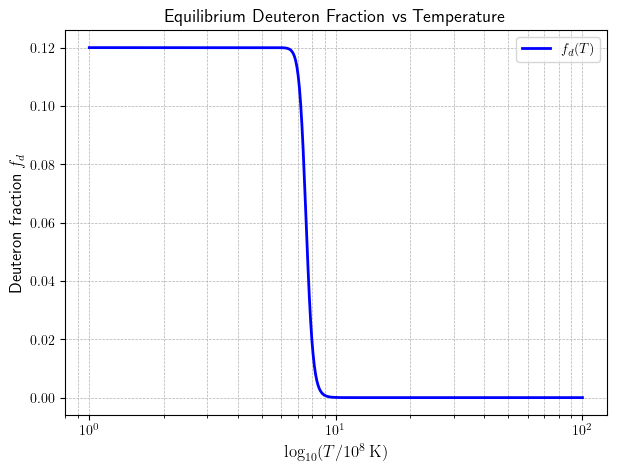

In [4]:
def f_d(T):
    beta = 1/(k_B * T)
    s = (12 * zeta(3) / np.sqrt(np.pi)) * ((k_B*T)/m_p_c2)**1.5 * eta * np.exp(beta*epsilon_b)
    return (1 + s - np.sqrt((1+s)**2 - 4*(s**2)*q*(1-q))) / (2*s)

k_B = 8.617333262e-5  # eV/K
m_p_c2 = 938.272e6    # eV
epsilon_b = 2.20e6    # eV
eta = 6e-10           # baryon-to-photon ratio
q = 0.12              # neutron fraction
T_vals = np.logspace(8., 10, 400)  # temperature range in Kelvin
fd_vals = [f_d(T) for T in T_vals]

plt.figure(figsize=(7,5))
plt.semilogx(T_vals/1e8, fd_vals, 'b-', lw=2, label=r'$f_d(T)$') 
#plt.axhline(q, color='r', ls='--', label=r'$f_d \to q$ at low $T$')
#plt.axvline(6e8/1e8, color='g', ls=':', label=r'$T \sim 6\times 10^8  K$')
plt.xlabel(r"$\log_{10}(T / 10^8 \,{\rm K})$", fontsize=12)
plt.ylabel(r"Deuteron fraction $f_d$", fontsize=12)
plt.title("Equilibrium Deuteron Fraction vs Temperature", fontsize=13)
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

<span style="color:red">Consider the recombination reaction
$$
p + e^- \rightleftharpoons H + \gamma,
$$
and treat protons, electrons and hydrogen atoms as classical ideal gases.                                                                             
Let $Ry$ denote the hydrogen binding energy (1 Rydberg $=13.6057\ \mathrm{eV}$). The degeneracies are $g_p=2,\ g_e=2,\ g_H=4$.                            
Let the total baryon density participating in H formation be $n_{\rm tot}$ (account for helium by a factor $1-2q$ if needed),                              
and define the neutral fraction $\displaystyle f_{\tiny H}=\frac{n_{\tiny H}}{n_{\tiny H}+n_{\tiny p}}$.                                                                                                                                   
The baryon-to-photon ratio is $\eta$.                                                                                                                        
**(i)** Starting from $\mu_{\tiny p}+\mu_{\tiny e}=\mu_{\tiny H}$ and the ideal-gas chemical potentials, **derive** the Saha equation in the form
$$
f_{\tiny H}=(1-f_{\tiny H})^2 s(T),
$$
and show that
$$
s(T)=4\zeta(3)\,(1-2q)\,\eta\left(\frac{k_{\tiny }B T}{m_{\tiny e} c^2}\right)^{3/2} e^{Ry/(k_{\tiny B} T)}.
$$
Rearrange and solve the resulting quadratic to obtain
$$
f_{\tiny H}=\frac{1+2s-\sqrt{1+4s}}{2s}.
$$
**(ii)** Using $\eta=6\times10^{-10}$ and a typical proton fraction $(1-2q)\approx0.76$, **compute and plot** $f_H(T)$ over the range $2000\!-\!6000\ \mathrm{K}$.                                                                                                                                             
Comment briefly on why recombination occurs at far lower temperature than $Ry/k_B$.


# **Recombination of Hydrogen in the Early Universe**

The recombination reaction is:

$$
\mathrm{p + e^- \rightleftharpoons H + \gamma}
$$

At chemical equilibrium:

$$
\mu_{\tiny p} + \mu_{\tiny e} = \mu_{\tiny H}
$$

where $\mu_i$ is the chemical potential of species $i$.


**Chemical potentials of classical ideal gases**

Treat electrons, protons, and hydrogen atoms as classical ideal gases:

$$
\begin{aligned}
\mu_{\tiny p} &= m_{\tiny p} c^2 + k_{\tiny B} T \ln(n_{\tiny p} \lambda_{\tiny p}^3) - k_{\tiny B} T \ln g_{\tiny p} \\
\mu_{\tiny e} &= m_{\tiny e} c^2 + k_{\tiny B} T \ln(n_{\tiny e} \lambda_{\tiny e}^3) - k_{\tiny B} T \ln g_{\tiny e} \\
\mu_{\tiny H} &= m_{\tiny H} c^2 + k_{\tiny B} T \ln(n_{\tiny H} \lambda_{\tiny H}^3) - k_{\tiny B} T \ln g_{\tiny H}
\end{aligned}
$$

* $g_i$ = spin degeneracy
  $\displaystyle [ \ g_{\tiny p} = 2, \ g_{\tiny e} = 2, \ g_{\tiny H} = 4 \ ]$
* electron thermal wavelength :$\displaystyle \lambda_{\tiny e} = \sqrt{\frac{h^2}{2 \pi m_{\tiny e} k_{\tiny B} T}}$ 
* Binding energy : $\displaystyle Ry = m_{\tiny p} c^2 + m_{\tiny e} c^2 - m_{\tiny H} c^2 \approx 13.6\,\rm eV$

**Plug into chemical equilibrium**

$$
m_{\tiny p} c^2 + m_{\tiny e} c^2 + k_{\tiny B} T \ln(n_{\tiny p} \lambda_{\tiny p}^3) + k_{\tiny B} T \ln(n_{\tiny e} \lambda_{\tiny e}^3) - k_{\tiny B} T \ln(g_{\tiny p} g_{\tiny e}) = m_{\tiny H} c^2 + k_{\tiny B} T \ln(n_{\tiny H} \lambda_{\tiny H}^3) - k_{\tiny B} T \ln g_{\tiny H}
$$

Using $m_{\tiny p} + m_{\tiny e} - m_{\tiny H} = Ry / c^2$ and $\lambda_{\tiny H} \approx \lambda_{\tiny p} \ll \lambda_{\tiny e}$:

$$
\boxed{
n_{\tiny H} = n_{\tiny p} n_{\tiny e} \lambda_{\tiny e}^3 \frac{g_{\tiny H}}{g_{\tiny p} g_{\tiny e}} e^{Ry / (k_{\tiny B} T)}
}
$$

This is the **Saha equation** in number densities.

**Neutral fraction**

Because the plasma is electrically neutral,

$$ n_{\tiny e}=n_{\tiny p}$$

Define total hydrogen-related number density (baryon number in H sector)

$$ n_{\tiny {\rm tot}}=n_{\tiny H} + n_{\tiny p}$$

Define the neutral fraction:

$$
f_{\tiny H} = \frac{n_{\tiny H}}{n_{\tiny H} + n_{\tiny p}} = \frac{n_{\tiny H}}{n_{\tiny {\rm tot}}} \Rightarrow \quad n_{\tiny H} = f_{\tiny H} n_{\tiny {\rm tot}} \ , \ n_{\tiny e} =\ n_{\tiny p} = (1 - f_{\tiny H}) n_{\tiny {\rm tot}}
$$

Then Saha equation becomes:

$$
f_{\tiny H} n_{\tiny {\rm tot}} = [(1 - f_{\tiny H}) n_{\tiny {\rm tot}}]^2 \lambda_{\tiny e}^3 \frac{g_{\tiny H}}{g_{\tiny p} g_{\tiny e}} e^{Ry / (k_{\tiny B} T)}
$$

Divide both sides by $n_{\rm tot}$:

$$
f_{\tiny H} = (1 - f_{\tiny H})^2 s, \qquad\qquad\qquad\qquad \because s = n_{\tiny {\rm tot}} \lambda_{\tiny e}^3 \frac{g_{\tiny H}}{g_{\tiny p} g_{\tiny e}} e^{Ry / (k_{\tiny B} T)}
$$

**Solve quadratic equation for $f_{\tiny H}$**

$$
s (1 - f_{\tiny H})^2 - f_{\tiny H} = 0 \implies s f_{\tiny H}^2 - (2s + 1) f_{\tiny H} + s = 0
$$

$$
f_{\tiny H} = \frac{1 + 2 s \pm \sqrt{(1 + 2 s)^2 - 4(s)(s)}}{2 s} = \frac{1 + 2 s \pm \sqrt{1 + 4 s + 4s^2 - 4s^2}}{2 s} = \frac{1 + 2 s \pm \sqrt{1 + 4s}}{2 s}
$$

Since  $\displaystyle 0<f_{\tiny H}<1$, we take the minus sign :

$$
\boxed{f_{\tiny H} = \frac{1 + 2 s - \sqrt{1 + 4 s}}{2 s} }
$$


**Express $s$ explicitly in terms of baryon-to-photon ratio $\eta$**

* Total baryon density : $\displaystyle n_{\tiny {\rm tot}} \approx n_{\tiny b} = (1 - 2q) \eta n_{\tiny \gamma}$
* Photon density : $\displaystyle n_{\tiny \gamma} = \frac{2 \zeta(3)}{\pi^2} \left(\frac{k_{\tiny B} T}{\hbar c}\right)^3$
* Electron thermal wavelength : $\displaystyle \lambda_{\tiny e} = \sqrt{\frac{h^2}{2 \pi m_{\tiny e} k_{\tiny B} T}}$
* ratio : $\displaystyle\frac{g_{\tiny H}}{g_{\tiny p} g_{\tiny e}} = \frac{4}{2\cdot 2} = 1$

Substitute and simplify step by step (using $\displaystyle\hbar = h / 2\pi$):

$$
n_{\tiny \gamma} \lambda_e^3 = \frac{2 \zeta(3)}{\pi^2} (2\pi)^{3/2} \left( \frac{k_{\tiny B} T}{m_{\tiny e} c^2} \right)^{3/2} = 4 \zeta(3) \sqrt{\frac{2}{\pi}} \left( \frac{k_{\tiny B} T}{m_{\tiny e} c^2} \right)^{3/2}
$$

Finally, include degeneracy factor and baryon-to-photon ratio:

$$
\boxed{s = 4 \zeta(3) \sqrt{\frac{2}{\pi}} (1 - 2q) \eta \left( \frac{k_{\tiny B} T}{m_{\tiny e} c^2} \right)^{3/2} e^{Ry / (k_{\tiny B} T)}}
$$

This is the **full Saha parameter formula** for the early universe.

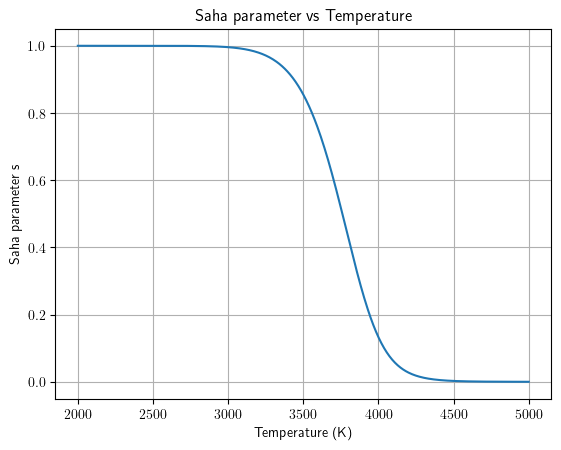

In [5]:
def saha_parameter(T, param, eta=6e-10, q=0.12):
    zeta, q, eta, k, m_e, c, Ry = param
    s = 4 * zeta(3) * np.sqrt(2/np.pi) * (1 - 2*q) * eta * (k*T / (m_e * c**2))**(3/2) * np.exp(Ry / (k*T))
    return (1 + 2*s - np.sqrt(1 + 4*s)) / (2*s)   
    
c   = const.c           # Speed of light in vacuum (m/s)
e   = const.e           # Elementary charge (C)
k   = const.k           # Boltzmann constant (J/K)
m_e = const.m_e         # Electron mass (kg)
eV  = const.eV          # 1 electronvolt in Joules
Ry  = const.physical_constants['Rydberg constant times hc in J'][0]   
eta = 6e-10   # Baryon-to-photon ratio  
q   = 0.0    # Lepton asymmetry parameter  
T   = np.linspace(2000, 5000, 500)  # Temperature range
param = zeta, q, eta, k, m_e, c, Ry 
f   = saha_parameter(T, param)

plt.plot(T, f)
plt.xlabel("Temperature (K)")
plt.ylabel("Saha parameter s")
plt.title("Saha parameter vs Temperature")
plt.grid(True)
plt.show()

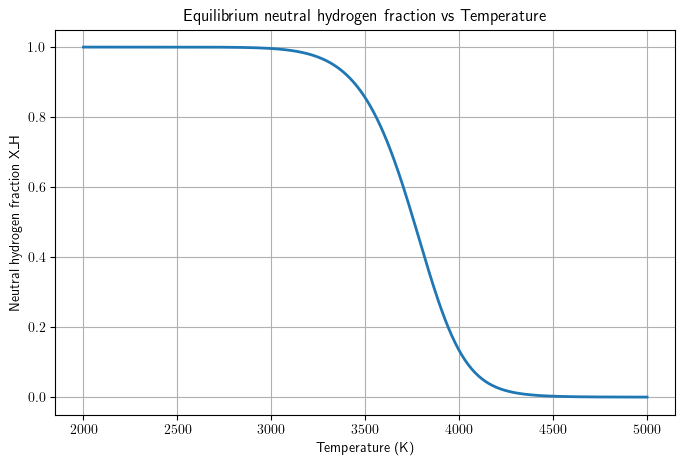

In [6]:
def neutral_hydrogen_fraction(T, params):
    zeta, k, h, c, eta, m_e, chi = params
    n_g = 2 * zeta(3) / np.pi**2 * (k*T / (h*c))**3                                 # Photon number density
    n_b = eta * n_g                                                                 # Baryon density
    s   = (m_e * k * T / (2 * np.pi * h**2))**(3/2) * np.exp(-chi / (k * T)) / n_b  # Saha parameter
    X_e = (-s + np.sqrt(s**2 + 4*s)) / 2                                            # Ionized fraction  
    X_H = 1 - X_e                                                                   # Neutral fraction
    return X_H

c   = const.c           # Speed of light in vacuum (m/s)
e   = const.e           # Elementary charge (C)
k   = const.k           # Boltzmann constant (J/K)
h   = const.h           # Planck constant (J*s)
m_e = const.m_e         # Electron mass (kg)
eV  = const.eV          # 1 electronvolt in Joules
chi = 13.6057 * e          # Hydrogen ionization energy in Joules
eta = 6e-10             # Baryon-to-photon ratio
T   = np.linspace(2000, 5000, 500)  # K
params = zeta, k, h, c, eta, m_e, chi 
X_H = neutral_hydrogen_fraction(T, params)

plt.figure(figsize=(8,5))
plt.plot(T, X_H, lw=2)
plt.xlabel('Temperature (K)')
plt.ylabel('Neutral hydrogen fraction X_H')
plt.title('Equilibrium neutral hydrogen fraction vs Temperature')
plt.grid(True)
plt.show()

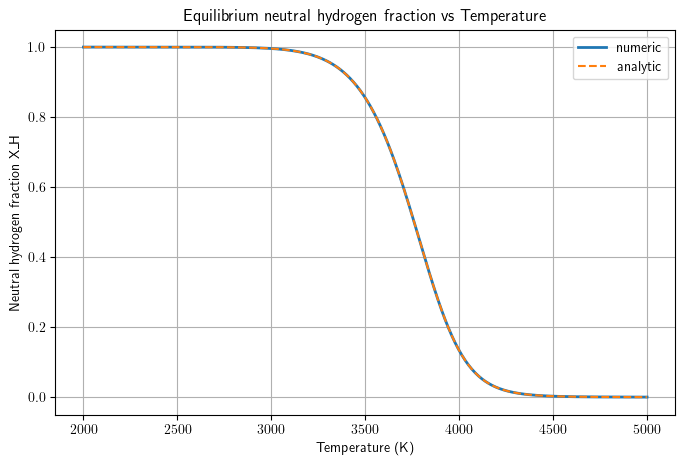

In [7]:
T   = np.linspace(2000, 5000, 500)  # Temperature range
f   = saha_parameter(T, param)
X_H = neutral_hydrogen_fraction(T, params)

plt.figure(figsize=(8,5))
plt.plot(T, X_H, lw=2, label='numeric')
plt.plot(T, f, '--', label='analytic')
plt.xlabel('Temperature (K)')
plt.ylabel('Neutral hydrogen fraction X_H')
plt.title('Equilibrium neutral hydrogen fraction vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

## AN INTRODUCTION TO THERMAL PHYSICS by Daniel V. Schroeder 


<span style="color:red">Suppose you have a box of atomic hydrogen, initially at room temperature and atmospheric pressure.                                                         
You then raise the temperature, keeping the volume fixed.                                                                                                      
**(a)** Find an expression for the fraction of the hydrogen that is ionized as a function of temperature.                                                
$\quad \;$(You’ll have to solve a quadratic equation.)                                                                                                                
$\quad ;$Check that your expression has the expected behavior at very low and very high temperatures.                                                                  
**(b)** At what temperature is exactly half of the hydrogen ionized?                                                                                      
**(c)** Would raising the initial pressure cause the temperature you found in part (b) to increase or decrease? Explain.                                       
**(d)** Plot the expression you found in part (a) as a function of the dimensionless variable $t = \frac{kT}{I}.$                                            
$\quad \;$Choose the range of $t$ values to clearly show the interesting part of the graph.


## (a) Fraction ionized as a function of $T$

**Reaction:**

$$
\mathrm{H} \rightleftharpoons \mathrm{p} + e^- .
$$

From ideal-gas chemical equilibrium (Saha relation) one finds (degeneracy factors for ground states give a net factor of 1):

$$
n_H = n_p\,n_e\,\lambda_e^3\,e^{I/(k_B T)},
$$

where $I=13.6\ \mathrm{eV}$ is the ionization energy and

$$
\lambda_e=\frac{h}{\sqrt{2\pi m_e k_B T}}
$$

is the electron thermal wavelength.

Define the ionized fraction

$$
x \equiv \frac{n_p}{n_0},\qquad n_e=n_p=n_0 x,\qquad n_H = n_0(1-x).
$$

Substitute into the Saha relation:

$$
n_0(1-x) = (n_0 x)^2\,\lambda_e^3\,e^{I/(k_B T)}.
$$

Rearrange:

$$
\frac{1-x}{x^2} = n_0\,\lambda_e^3\,e^{I/(k_B T)} \equiv s(T).
$$

This gives the quadratic equation

$$
s(T)\,x^2 + x - 1 = 0.
$$

Solve with the quadratic formula ($a=s,\ b=1,\ c=-1$):

$$
x(T) = \frac{-1 + \sqrt{1 + 4 s(T)}}{2 s(T)}
= \frac{\sqrt{1+4s(T)} - 1}{2 s(T)}.
$$

This is the desired expression for the ionized fraction in terms of $T$ and $n_0$, with

$$
s(T)=n_0\;\lambda_e^3\;e^{I/(k_B T)} = n_0\;\frac{h^3}{(2\pi m_e k_B T)^{3/2}}\;e^{I/(k_B T)}.
$$

**Limiting behavior**

* Low $T$: $I/(kT)$ large so $s(T)$ is extremely large $\Rightarrow x\to 0$ (almost no ionization).
* High $T$: $s(T)$ small $\Rightarrow x\to 1$ (fully ionized).
  So the formula has the expected limits.


## (b) Temperature at which half the hydrogen is ionized

Half-ionized means $x=\tfrac12$. From the Saha relation we had

$$
\frac{1-x}{x^2}=s(T)\quad\Rightarrow\quad s(T)=2.
$$

Using the definition

$$
s(T)=n_0\,\lambda_e^3(T)\,e^{I/(kT)},
\qquad
\lambda_e(T)=\frac{h}{\sqrt{2\pi m_e kT}},
$$

the half-ionization condition becomes

$$
n_0\;\frac{h^3}{(2\pi m_e k T)^{3/2}}\;e^{I/(kT)} = 2.
$$

This is a transcendental equation for $T$.

Reduce with the substitution $y=\dfrac{I}{kT}$

Let

$$
y\equiv\frac{I}{kT}\quad\Longrightarrow\quad T=\frac{I}{k y}.
$$

Then

$$
T^{-3/2}=\left(\frac{k y}{I}\right)^{3/2},
$$

and the half-ionization equation becomes

$$
n_0 h^3 (2\pi m_e k)^{-3/2}\left(\frac{k y}{I}\right)^{3/2} e^{y} = 2.
$$

Collect constants into

$$
C \equiv \frac{n_0 h^3}{(2\pi m_e)^{3/2} I^{3/2}},
$$

so the equation is

$$
C\,y^{3/2} e^{y} = 2.
$$

Put into Lambert-$W$ form

Raise both sides to the $2/3$ power:

$$
y\,e^{2y/3} = \Big(\frac{2}{C}\Big)^{2/3}.
$$

Let $u=\tfrac{2}{3}y$ (so $y=\tfrac{3}{2}u$). Then

$$
\frac{3}{2}u \, e^{u} = \Big(\frac{2}{C}\Big)^{2/3}
\quad\Longrightarrow\quad
u e^{u} = \frac{2}{3}\Big(\frac{2}{C}\Big)^{2/3}.
$$

Hence

$$
u = W\!\left(\frac{2}{3}\Big(\frac{2}{C}\Big)^{2/3}\right),
$$

where $W$ is the principal branch of the Lambert $W$-function. Therefore

$$
y = \tfrac{3}{2}u = \tfrac{3}{2}\,W\!\left(\frac{2}{3}\Big(\frac{2}{C}\Big)^{2/3}\right).
$$

Finally,

$$
\boxed{ \; T_{1/2} \;=\; \frac{I}{k\,y}
\;=\; \frac{2I}{3k}\; \frac{1}{W\!\Big(\dfrac{2}{3}\big(\dfrac{2}{C}\big)^{2/3}\Big)} \;}
$$

with

$$
C = \frac{n_0 h^3}{(2\pi m_e)^{3/2} I^{3/2}}.
$$
 
**Alternate explicit argument form**

Expanding the $W$-argument explicitly,

$$
\frac{2}{3}\Big(\frac{2}{C}\Big)^{2/3}
= \frac{2}{3}\,2^{2/3}\,\frac{2\pi m_e I}{n_0^{2/3} h^2}.
$$

So you can also write

$$
T_{1/2}=\frac{2I}{3k}\left[ W\!\Big( \frac{2^{5/3}\pi m_e I}{3\,n_0^{2/3} h^2}\Big)\right]^{-1}.
$$

**example (box initially 1 atm, 300 K)**

If the box started at 1 atm and $T_0=300$ K, the number density is

$$
n_0=\frac{P_0}{kT_0}\approx 2.446\times 10^{25}\ \mathrm{m^{-3}}.
$$

Evaluating the formula above (principal $W$ branch) gives

$$
\boxed{T_{1/2}\approx 2.393\times 10^{4}\ \mathrm{K}\ }.
$$

*That agrees with the numerical solution you (or I) found earlier by direct root finding.*


## (c) Effect of increasing initial pressure

If the initial pressure is raised (at the same initial temperature and fixed volume), the total number density $n_0$ increases.                             
From the half-ionization condition $s(T)=2$ and

$$
s(T)\propto n_0\,T^{-3/2}\,e^{I/(k_B T)},
$$

an increase in $n_0$ makes $s$ larger at the same $T$.                                                                                                      
To restore $s=2$ (half ionized), $T$ must increase (higher $T$ decreases both $\lambda_e^3\propto T^{-3/2}$ and the factor $e^{I/(kT)}$).                      
Thus **raising the initial pressure increases the temperature required to reach half ionization**.                                                           
Physically: higher density favors recombination, so you need a higher temperature to ionize half the atoms.


Initial number density n0 = 2.446e+25 m^-3 (from P0=1 atm, T0=300 K)
T_half (x=0.5) = 2.393297e+04 K, s(T_half) = 2.000000e+00 (should be 2)


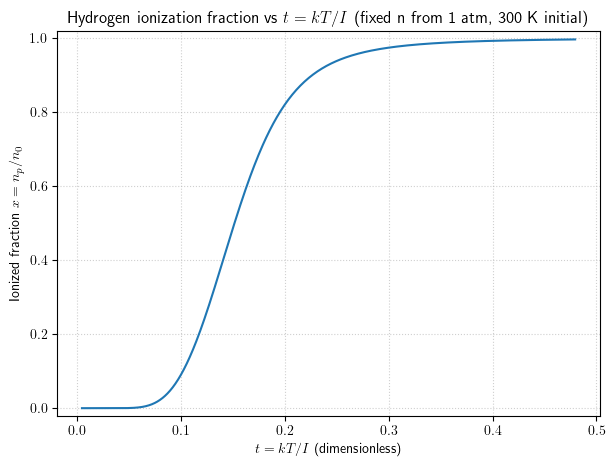

T = 1.000e+04 K -> t = 6.336e-02, x = 3.709521e-03
T = 5.000e+04 K -> t = 3.168e-01, x = 9.795782e-01
T = 1.000e+05 K -> t = 6.336e-01, x = 9.984522e-01
T = 2.393e+04 K -> t = 1.516e-01, x = 5.000000e-01
T = 1.000e+07 K -> t = 6.336e+01, x = 9.999997e-01


In [8]:
def lambda_e(T):
    return h / np.sqrt(2 * np.pi * m_e * k * T)

def s_of_T(T):
    return n0 * lambda_e(T)**3 * np.exp(I / (k * T))

c   = const.c           # Speed of light in vacuum (m/s)
e   = const.e           # Elementary charge (C)
k   = const.k           # Boltzmann constant (J/K)
h   = const.h           # Planck constant (J*s)
m_e = const.m_e         # Electron mass (kg)
eV  = const.eV          # 1 electronvolt in Joules
atm = const.atm         # 1 atm pressure
I_eV = 13.6             # Ionization energy in eV
I    = I_eV * e         # Ionization energy in J
P0   = 1.0 * atm        # initial pressure (1 atm)
T0   = 300.0            # initial temperature (room temp, K)
n0   = P0 / (k * T0)    # total number density (fixed, V fixed)
print(f"Initial number density n0 = {n0:.3e} m^-3 (from P0=1 atm, T0=300 K)")
T_vals = np.logspace(3, 8, 800)   # 1e3 to 1e8 K
s_vals = s_of_T(T_vals)

if (s_vals > 2).all():
    raise RuntimeError("s(T)>2 for all T in search range; increase T range")
if (s_vals < 2).all():
    raise RuntimeError("s(T)<2 for all T in search range; decrease T range")

idx = np.where(s_vals < 2)[0][0]
T_low, T_high = T_vals[idx-1], T_vals[idx]
T_low, T_high, s_of_T(T_low), s_of_T(T_high)

def find_root_bisect(f, a, b, tol=1e-6, maxiter=100):
    fa, fb = f(a)-2, f(b)-2
    if fa*fb > 0:
        raise ValueError("Root not bracketed")
    for _ in range(maxiter):
        m = 0.5*(a+b)
        fm = f(m)-2
        if abs(fm) < tol:
            return m
        if fa*fm <= 0:
            b = m
            fb = fm
        else:
            a = m
            fa = fm
    return 0.5*(a+b)

T_half = find_root_bisect(s_of_T, T_low, T_high, tol=1e-12)
s_T_half = s_of_T(T_half)
print(f"T_half (x=0.5) = {T_half:.6e} K, s(T_half) = {s_T_half:.6e} (should be 2)")

def ionized_frac(T):
    s = s_of_T(T)
    return (np.sqrt(1 + 4*s) - 1) / (2*s)

T_plot = np.logspace(np.log10(T_half)-1.5, np.log10(T_half)+0.5, 1000)
x_plot = ionized_frac(T_plot)
t_plot = (k * T_plot) / I  # dimensionless t = kT/I

plt.figure(figsize=(7,5))
plt.plot(t_plot, x_plot, lw=1.5)
plt.ylim(-0.02, 1.02)
plt.xlabel(r'$t = kT/I$ (dimensionless)')
plt.ylabel('Ionized fraction $x = n_p/n_{0}$')
plt.title('Hydrogen ionization fraction vs $t=kT/I$ (fixed n from 1 atm, 300 K initial)')
plt.grid(True, which='both', ls=':', alpha=0.6)
plt.show()

for T_sample in [1e4, 5e4, 1e5, T_half, 1e7]:
    print(f"T = {T_sample:.3e} K -> t = {k*T_sample/I:.3e}, x = {ionized_frac(T_sample):.6e}")
